# Chapter 5, Example 4a
## Implementing L2 regularizers for training

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l2
import tensorflow.keras.datasets.mnist as mnist

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')

2023-07-16 14:51:04.540308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
batch_size = 128
num_classes = 10
no_epochs = 20

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [4]:
def valid_callback(name):
    return [tf.keras.callbacks.EarlyStopping(monitor='val_ce', patience=20),
           tfdocs.modeling.EpochDots()]

In [5]:
def compile_and_fit(model, name, max_epochs=1000):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.losses.CategoricalCrossentropy(name='ce'),'accuracy'])
    
    history = model.fit(train_x, train_y, 
                        epochs=max_epochs, 
                        batch_size = batch_size,
                        callbacks=valid_callback(name), 
                        validation_data=(test_x,test_y))
    
    return history

histories={}

In [6]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(625, activation='relu'),
  Dense(500, activation='relu'),
  Dense(10, activation='softmax')
])

histories['model'] = compile_and_fit(model, 'model')

Epoch 1/1000
469/469 [==============================] - ETA: 0s - loss: 0.2117 - ce: 0.2117 - accuracy: 0.9371
Epoch: 0, accuracy:0.9371,  ce:0.2117,  loss:0.2117,  val_accuracy:0.9713,  val_ce:0.0915,  val_loss:0.0925,  
469/469 [==============================] - 6s 11ms/step - loss: 0.2117 - ce: 0.2117 - accuracy: 0.9371 - val_loss: 0.0925 - val_ce: 0.0915 - val_accuracy: 0.9713
Epoch 2/1000
469/469 [==============================] - 7s 15ms/step - loss: 0.0775 - ce: 0.0775 - accuracy: 0.9761 - val_loss: 0.0837 - val_ce: 0.0828 - val_accuracy: 0.9743
Epoch 3/1000
469/469 [==============================] - 8s 16ms/step - loss: 0.0499 - ce: 0.0499 - accuracy: 0.9841 - val_loss: 0.0763 - val_ce: 0.0755 - val_accuracy: 0.9753
Epoch 4/1000
469/469 [==============================] - 8s 18ms/step - loss: 0.0361 - ce: 0.0361 - accuracy: 0.9883 - val_loss: 0.0592 - val_ce: 0.0586 - val_accuracy: 0.9813
Epoch 5/1000
469/469 [==============================] - 10s 21ms/step - loss: 0.0272 - ce: 

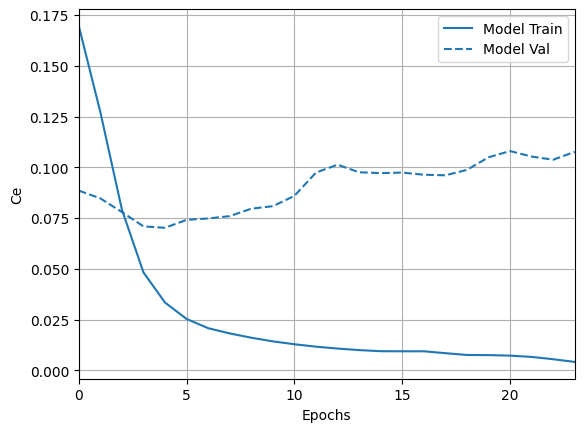

In [7]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
plotter.plot(histories)

In [8]:
regularized_model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(625, activation='relu', kernel_regularizer=l2(0.0001)),
  Dense(500, activation='relu', kernel_regularizer=l2(0.0001)),
  Dense(10, activation='softmax')
])

histories['l2-model'] = compile_and_fit(regularized_model, 'l2-model')

Epoch 1/1000
467/469 [============================>.] - ETA: 0s - loss: 0.3108 - ce: 0.2133 - accuracy: 0.9374
Epoch: 0, accuracy:0.9375,  ce:0.2129,  loss:0.3104,  val_accuracy:0.9668,  val_ce:0.1020,  val_loss:0.1927,  
469/469 [==============================] - 10s 19ms/step - loss: 0.3104 - ce: 0.2129 - accuracy: 0.9375 - val_loss: 0.1927 - val_ce: 0.1020 - val_accuracy: 0.9668
Epoch 2/1000
469/469 [==============================] - 9s 20ms/step - loss: 0.1676 - ce: 0.0832 - accuracy: 0.9739 - val_loss: 0.1707 - val_ce: 0.0902 - val_accuracy: 0.9705
Epoch 3/1000
469/469 [==============================] - 10s 21ms/step - loss: 0.1339 - ce: 0.0586 - accuracy: 0.9820 - val_loss: 0.1355 - val_ce: 0.0637 - val_accuracy: 0.9811
Epoch 4/1000
469/469 [==============================] - 11s 24ms/step - loss: 0.1144 - ce: 0.0466 - accuracy: 0.9851 - val_loss: 0.1425 - val_ce: 0.0761 - val_accuracy: 0.9760
Epoch 5/1000
469/469 [==============================] - 10s 22ms/step - loss: 0.1061 - c

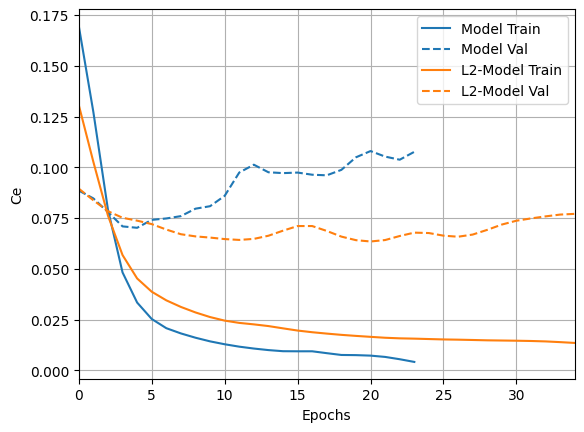

In [9]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
plotter.plot(histories)

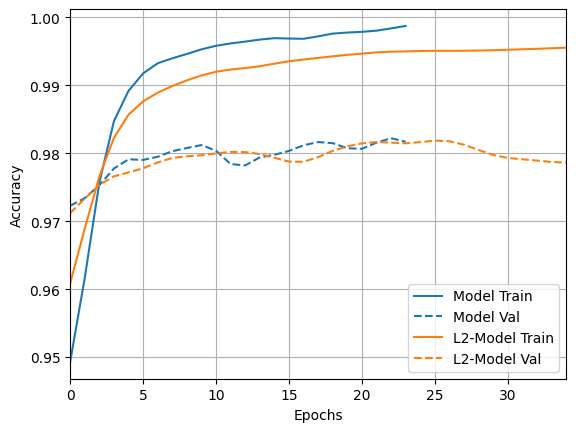

In [10]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)